<a href="https://colab.research.google.com/github/urlapovia03/university/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%9F%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%B8%CC%86_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%BE%D1%81%D1%82%D1%83%D0%BF%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D1%81%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B8%CC%86_%D0%B8%D0%BD%D1%84%D1%80%D0%B0%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%82%D1%83%D1%80%D1%8B_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_OpenStreetMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №9. Пространственный анализ доступности социальной инфраструктуры с использованием OpenStreetMap**

## **Цель работы**

Овладеть методами пространственного анализа городских территорий на основе открытых геоданных: загрузка данных из OpenStreetMap, конструирование пространственных признаков и их визуализация на тепловых картах административных районов и гексагональной H3‑сетки.

## **Введение**

Доступность социальной инфраструктуры (школы, детские сады, поликлиники, общественный транспорт и т.п.) является базовой характеристикой качества городской среды. Современные методы геоанализа позволяют количественно оценивать уровень такой доступности для разных участков города и визуализировать результаты в удобной для интерпретации форме.

В данной практической работе вы выполните полный цикл пространственного анализа: от выбора территории и постановки исследовательской задачи до расчёта интегрального показателя доступности и построения тепловых карт по районам и гексагональной ячейке.

## **Задание**

Провести пространственное исследование уровня доступности социальной инфраструктуры для жителей выбранной городской территории, используя данные OpenStreetMap, и визуализировать результаты:

- на карте административных районов;
- на гексагональной H3‑сетке.

---

## **Порядок выполнения работы**

### **Часть 1. Подготовка данных и постановка задачи**

1. **Выбор территории и фокуса исследования**

   - Выберите город и область интереса (ROI) для анализа:
     - это может быть весь город или его часть (например, центральные районы, спальный район, новая застройка).
   - Определите фокус исследования:
     - например:
       - доступность школ и детских садов;
       - доступность поликлиник и больниц;
       - комплексная доступность нескольких типов объектов (школы + сады + поликлиники + остановки ОТ).
   - Кратко обоснуйте выбор:
     - почему вы выбрали именно эту территорию;
     - почему выбранный фокус социальной инфраструктуры важен и интересен для анализа.

In [ ]:
# Ваш код

В качестве территории исследования выбран район Южное Бутово города Москвы.
Данный район характеризуется смешанной структурой застройки, включающей как районы массового жилищного строительства, так и новые жилые комплексы, что позволяет проанализировать различия в доступности социальной инфраструктуры.
В качестве фокуса исследования выбрана комплексная доступность школ, детских садов, поликлиник и остановок общественного транспорта, так как именно совокупность этих объектов определяет комфорт проживания населения и отражает качество городской среды.

2. **Определение признаков доступности**

   - Сформулируйте **не менее 5 признаков**, которые, по вашему мнению, характеризуют доступность социальной инфраструктуры для жителей. Примеры признаков:
     - количество объектов нужного типа в шаговой доступности;
     - средняя удалённость до ближайшего объекта;
     - наличие альтернативных видов инфраструктуры (например, частные и государственные школы);
     - транспортная доступность (наличие остановок общественного транспорта поблизости);
     - обеспеченность зелёными зонами рядом с социальной инфраструктурой (парки возле школ и т.п.).
   - Для каждого признака определите, **какими тегами OpenStreetMap** его можно описать. Примеры тегов:
     - `amenity=school`, `amenity=kindergarten`, `amenity=clinic`, `amenity=hospital`;
     - `highway=bus_stop`, `railway=subway_entrance`;
     - `leisure=park`, `leisure=pitch`;
     - границы районов: `boundary=administrative`, `admin_level=*`.
   - Составьте **таблицу соответствия**:

     | признак                     | Описание признака                             | OSM‑теги / атрибуты                       |
     |----------------------------|----------------------------------------------|-------------------------------------------|
     | Кол-во школ в шаговой доступности | Школы в радиусе 800 м от ячейки/района | `amenity=school`                          |
     | Наличие детских садов      | Детсады в радиусе 600 м                     | `amenity=kindergarten`                    |
     | Транспортная доступность   | Остановки ОТ в радиусе 400 м                | `highway=bus_stop`, `railway=tram_stop`   |
     | Близость метро             | Минимальное расстояние до метро             | `railway=subway_entrance`                 |
     | Наличие зелёных зон        | Площадь парков в радиусе 800 м              | `leisure=park`                            |


**Таблица соответствия**
| Признак                          | Описание признака                                   | OSM-теги / атрибуты                                  |
|----------------------------------|----------------------------------------------------|------------------------------------------------------|
| Кол-во школ в шаговой доступности | Школы в радиусе 800 м от ячейки / района           | `amenity=school`                                     |
| Наличие детских садов            | Детские сады в радиусе 600 м                       | `amenity=kindergarten`                              |
| Доступность медицинской помощи   | Поликлиники и больницы в радиусе 1000 м            | `amenity=clinic`, `amenity=hospital`                |
| Транспортная доступность         | Остановки общественного транспорта в радиусе 400 м | `highway=bus_stop`, `railway=tram_stop`             |
| Близость метро                   | Минимальное расстояние до ближайшего входа в метро | `railway=subway_entrance`                            |
| Наличие зелёных зон и парков     | Площадь парков и зон отдыха в радиусе 800 м        | `leisure=park`, `leisure=garden`                    |
| Доступность торговых центров     | Торговые центры и крупные магазины в радиусе 1000 м| `shop=mall`, `amenity=marketplace`                  |





3. **Сбор исходных данных из OpenStreetMap**

   - Настройте необходимые библиотеки (по аналогии с примером):  
     `osmnx`, `geopandas`, `h3`, `h3pandas`, `leafmap`, `shapely`, `pandas`, `numpy` и др.
   - С помощью интерактивной карты (`leafmap.Map` и инструмент рисования) определите **bounding box** или полигон области интереса.
   - Загрузите из OSM с помощью `osmnx.features_from_bbox()` (или аналогичных функций):
     - объекты социальной инфраструктуры, соответствующие вашим признакам;
     - слои, отражающие административные границы районов (или муниципальных округов).

   - Приведите все пространственные слои к единой системе координат (например, `EPSG:3857` для метрических расчётов).



In [197]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as geom

import h3
import h3pandas
import leafmap
place_name = "Южное Бутово, Москва, Россия"
boundary = ox.geocode_to_gdf(place_name)
boundary
tags_education = {
    "amenity": ["school", "kindergarten"]
}

education = ox.features_from_polygon(
    boundary.geometry.iloc[0],
    tags=tags_education
)
tags_kdd = {
    "amenity": ["kindergarten"]
}

kdg = ox.features_from_polygon(
    boundary.geometry.iloc[0],
    tags=tags_kgd
)
tags_health = {
    "amenity": ["clinic", "hospital"]
}

health = ox.features_from_polygon(
    boundary.geometry.iloc[0],
    tags=tags_health
)
tags_transport = {
    "highway": ["bus_stop"],
    "railway": ["tram_stop"]
}

transport = ox.features_from_polygon(
    boundary.geometry.iloc[0],
    tags=tags_transport
)
tags_subway = {
    "railway": ["subway_entrance"]
}

subway = ox.features_from_polygon(
    boundary.geometry.iloc[0],
    tags=tags_subway
)
tags_green = {
    "leisure": ["park", "garden"]
}

green = ox.features_from_polygon(
    boundary.geometry.iloc[0],
    tags=tags_green
)
tags_shop = {
    "shop":["mall"],
    "amenity": ["marketplace"]
}

shop = ox.features_from_polygon(
    boundary.geometry.iloc[0],
    tags=tags_shop
)
boundary = boundary.to_crs(epsg=3857)
education = education.to_crs(epsg=3857)
health = health.to_crs(epsg=3857)
transport = transport.to_crs(epsg=3857)
green = green.to_crs(epsg=3857)
shop

geometry  \
element id                                                              
node    609736858                           POINT (37.54196 55.54836)   
        6780363175                          POINT (37.57205 55.54175)   
way     60698007    POLYGON ((37.54255 55.54879, 37.5426 55.54873,...   
        277671061   POLYGON ((37.57221 55.54258, 37.57215 55.54238...   
        516807371   POLYGON ((37.52599 55.54413, 37.52552 55.54392...   
        960756303   POLYGON ((37.49747 55.53344, 37.49746 55.53285...   

                        amenity                           name addr:city  \
element id                                                                 
node    609736858   marketplace                          Рынок       NaN   
        6780363175  marketplace          Ярмарка выходного дня       NaN   
way     60698007            NaN  Торговый центр "Южное Бутово"    Москва   
        277671061           NaN       Торговый центр "Станция"    Москва   
        516807371           NaN                            NaN    Москва   
        960756303           NaN                       Потапово    Москва   

                   addr:country addr:housenumber addr:region  \
element id                                                     
node    609736858           NaN              NaN         NaN   
        6780363175          NaN              NaN         NaN   
way     60698007             RU                4      Москва   
        277671061           NaN               47         NaN   
        516807371           NaN                2         NaN   
        960756303           NaN               14         NaN   

                                   addr:street    building building:levels  \
element id                                                                   
node    609736858                          NaN         NaN             NaN   
        6780363175                         NaN         NaN             NaN   
way     60698007               Венёвская улица      retail               3   
        277671061        Синельниковская улица  commercial               2   
        516807371       улица Адмирала Руднева      retail               7   
        960756303   улица Академика Понтрягина      retail             NaN   

                    ...      opening_hours  shop addr:postcode  \
element id          ...                                          
node    609736858   ...                NaN   NaN           NaN   
        6780363175  ...                NaN   NaN           NaN   
way     60698007    ...  Mo-Su 10:00-22:00  mall           NaN   
        277671061   ...                NaN  mall        117623   
        516807371   ...                NaN  mall           NaN   
        960756303   ...                NaN  mall           NaN   

                   building:colour building:material roof:angle roof:colour  \
element id                                                                    
node    609736858              NaN               NaN        NaN         NaN   
        6780363175             NaN               NaN        NaN         NaN   
way     60698007               NaN               NaN        NaN         NaN   
        277671061             grey           plaster         30       brown   
        516807371              NaN               NaN        NaN         NaN   
        960756303              NaN               NaN        NaN         NaN   

                   roof:material roof:shape wheelchair  
element id                                              
node    609736858            NaN        NaN        NaN  
        6780363175           NaN        NaN        NaN  
way     60698007             NaN        NaN        NaN  
        277671061          metal     hipped        yes  
        516807371            NaN        NaN        NaN  
        960756303            NaN        NaN        NaN  

[6 rows x 21 columns]

---

### **Часть 2. Пространственное агрегирование и инженерия признаков**

1. **Построение гексагональной H3‑сетki**

   - Определите подходящее **разрешение (resolution)** H3‑сетки для вашей территории:
     - маленькое значение (5–7) — крупные ячейки для больших территорий;
     - большое значение (8–10 и выше) — более детальный анализ на уровне кварталов/микрорайонов.
   - Обоснуйте ваш выбор resolution с точки зрения:
     - размера города или ROI;
     - характера объектов (шаговая доступность, плотность застройки);
     - удобства визуализации и интерпретации.
   - Сгенерируйте H3‑индексы, покрывающие выбранный полигон (через `h3.polyfill_geojson`), и создайте `GeoDataFrame` с геометриями ячеек.

In [198]:
boundary_wgs = boundary.to_crs(epsg=4326)
polygon = boundary_wgs.geometry.iloc[0]
polygon_geojson = polygon.__geo_interface__
resolution = 9

h3_indexes = h3.geo_to_cells(
    polygon_geojson,
    res=resolution
)
hexagons = gpd.GeoDataFrame(
    {
        "h3_index": list(h3_indexes),
        "geometry": [
            geom.Polygon(
                [(lon, lat) for lat, lon in h3.cell_to_boundary(h)]
            )
            for h in h3_indexes
        ]
    },
    crs="EPSG:4326"
)
hexagons = hexagons.to_crs(epsg=3857)
hexagons

,h3_index,geometry
0,8911aa4da23ffff,"POLYGON ((4181026.699 7467142.058, 4181291.416..."
1,8911aa4d857ffff,"POLYGON ((4178073.875 7469070.776, 4178338.671..."
2,8911aa4db53ffff,"POLYGON ((4181718.351 7468155.603, 4181983.096..."
3,891181b2db3ffff,"POLYGON ((4176674.398 7464335.019, 4176939.047..."
4,8911aa4d15bffff,"POLYGON ((4171548.506 7464856.548, 4171813.202..."
...,...,...
176,8911aa4da9bffff,"POLYGON ((4178055.897 7466361.859, 4178320.605..."
177,891181b748fffff,"POLYGON ((4182960.76 7466401.31, 4183225.441 7..."
178,8911aa4d10bffff,"POLYGON ((4172013.659 7466434.926, 4172278.403..."
179,8911aa4de33ffff,"POLYGON ((4176467.477 7467608.126, 4176732.234..."


Для построения гексагональной сетки была выбрана разрешающая способность H3 с resolution = 9.
Данный уровень детализации соответствует масштабу внутригородского анализа и позволяет учитывать шаговую доступность объектов социальной инфраструктуры.
Размер ячеек обеспечивает баланс между пространственной детализацией, устойчивостью статистических показателей и наглядностью визуализации.

2. **Агрегирование по административным районам**

   - Подготовьте слой районов (например, `admin_level=8`):
     - при необходимости отфильтруйте только нужный уровень административного деления.
   - Для каждого района рассчитайте показатели, связанные с выбранными типами инфраструктуры. Примеры:
     - количество школ/детсадов/поликлиник внутри района;
     - плотность объектов (количество на км²);
     - суммарная площадь парков;
     - количество остановок ОТ.
   - Добавьте эти признаки в таблицу районов.

In [206]:
boundary = boundary.to_crs(epsg=3857)
education = education.to_crs(epsg=3857)
kdg = kdg.to_crs(epsg=3857)
transport = transport.to_crs(epsg=3857)
shop = shop.to_crs(epsg=3857)
health=health.to_crs(epsg=3857)
subway=subway.to_crs(epsg=3857)
edu_joined = gpd.sjoin(
    education,
    boundary,
    how="inner",
    predicate="within"
)

education_count = edu_joined.groupby("name_right").size()

boundary["education_count"] = (
    boundary["name"]
    .map(education_count)
    .fillna(0)
)

transport_joined = gpd.sjoin(
    transport,
    boundary,
    how="inner",
    predicate="within"
)

transport_count = transport_joined.groupby("name_right").size()

boundary["transport_count"] = (
    boundary["name"]
    .map(transport_count)
    .fillna(0)
)
health_joined = gpd.sjoin(
    health,
    boundary,
    how="inner",
    predicate="within"
)

health_count = health_joined.groupby("name_right").size()

boundary["health_count"] = (
    boundary["name"]
    .map(health_count)
    .fillna(0)
)

kdg_joined = gpd.sjoin(
    kdg,
    boundary,
    how="inner",
    predicate="within"
)

kdg_count = kdg_joined.groupby("name_right").size()

boundary["kdg_count"] = (
    boundary["name"]
    .map(kdg_count)
    .fillna(0)
)


subway_joined = gpd.sjoin(
    subway,
    boundary,
    how="inner",
    predicate="within"
)

subway_count = subway_joined.groupby("name").size()

boundary["subway_count"] = (
    boundary["name"]
    .map(subway_count)
    .fillna(0)
)

shop_joined = gpd.sjoin(
    shop,
    boundary,
    how="inner",
    predicate="within"
)

shop_count = shop_joined.groupby("name_right").size()

boundary["shop_count"] = (
    boundary["name"]
    .map(shop_count)
    .fillna(0)
)


boundary["area_km2"] = boundary.geometry.area / 1_000_000

boundary["edu_density"] = (
    boundary["education_count"] / boundary["area_km2"]
)
boundary["kdg_density"] = (
    boundary["kdg_count"] / boundary["area_km2"]
)
boundary["transport_density"] = (
    boundary["transport_count"] / boundary["area_km2"]
)
boundary["subway_density"] = (
    boundary["subway_count"] / boundary["area_km2"]
)
boundary["shop_density"] = (
    boundary["shop_count"] / boundary["area_km2"]
)



green = green.to_crs(epsg=3857)

green_joined = gpd.sjoin(
    green,
    boundary,
    how="inner",
    predicate="within"
)
green_joined["park_area"] = green_joined.geometry.area

parks_area = green_joined.groupby("name_right")["park_area"].sum()
boundary["parks_area_m2"] = (
    boundary["name"]
    .map(parks_area)
    .fillna(0)
)
boundary

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,...,kdg_count,subway_count,shop_count,area_km2,edu_density,parks_area_m2,kdg_density,transport_density,subway_density,shop_density
0,"POLYGON ((4171162.448 7466212.317, 4171165.799...",37.47019,55.516684,37.589303,55.560408,181814306,relation,1257403,55.541272,37.532539,...,51,6,6,57.243414,1.572233,4.885882e+06,0.890932,3.07459,0.104816,0.104816


3. **Инженерия пространственных признаков для H3‑ячеек**

   - Определите радиусы (в метрах) для анализа **окружения ячейки**:
     - например: ближний радиус 400–600 м, средний радиус 800–1200 м.
   - Для каждой H3‑ячейки рассчитайте **не менее 10 пространственных признаков**, например:
     - количество школ в ближнем радиусе;
     - количество детсадов в ближнем и среднем радиусе;
     - количество поликлиник/больниц в среднем радиусе;
     - суммарная площадь парков в ближнем радиусе;
     - количество остановок общественного транспорта в ближнем радиусе;
     - расстояние до ближайшей школы;
     - расстояние до ближайшей поликлиники;
     - расстояние до ближайшей станции метро или ж/д;
     - плотность объектов социальной инфраструктуры (общее число объектов на площадь буфера);
     - отношение количества социальных объектов к количеству зданий (как прокси обеспеченности).
   - **Дополнительное задание**: придумайте и реализуйте **не менее 2 новых признаков**, которых не было в теоретическом материале и примере, например:
     - индекс смешанности инфраструктуры (сколько разных типов объектов есть в радиусе);
     - доля зелёных зон в буфере относительно общей площади буфера;
     - средневзвешенное расстояние до всех школ/садов (а не только ближайшего).

(np.float64(4170428.772957319),
 np.float64(4185178.0311818686),
 np.float64(7462082.710309462),
 np.float64(7471937.206920055))

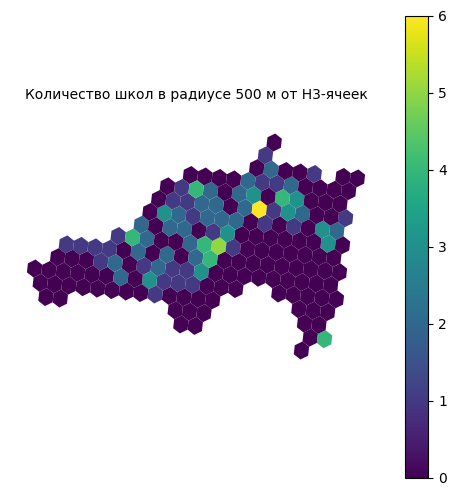

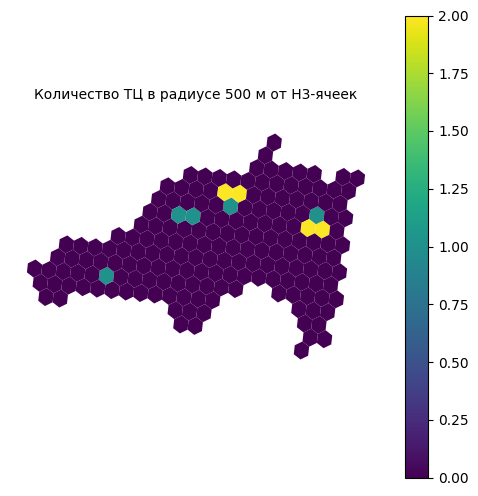

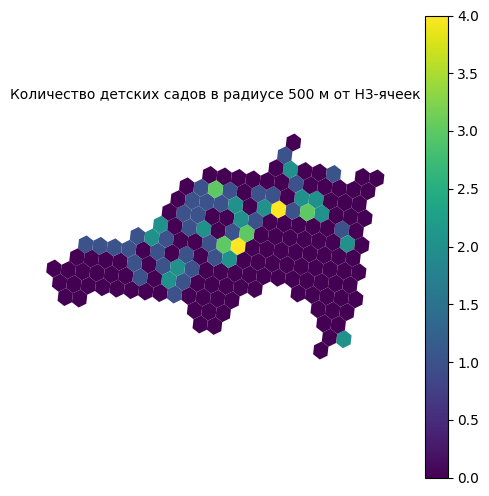

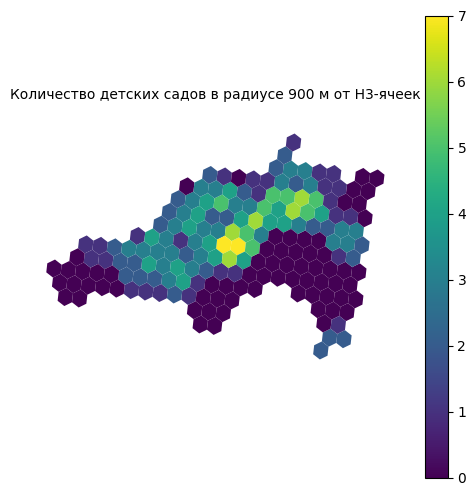

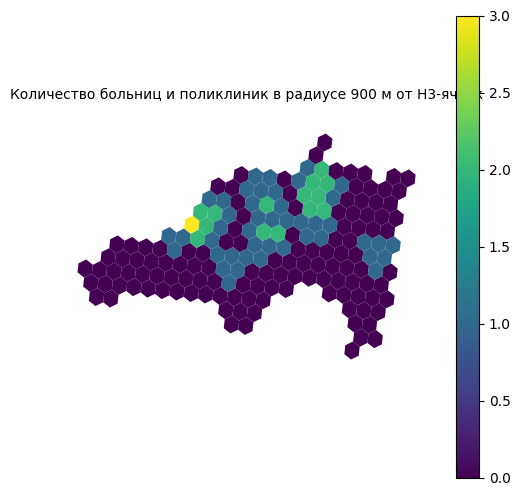

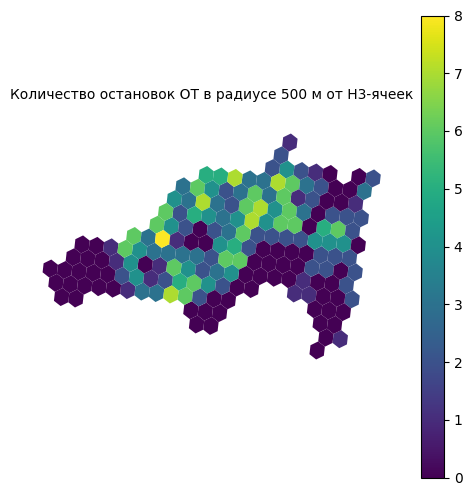

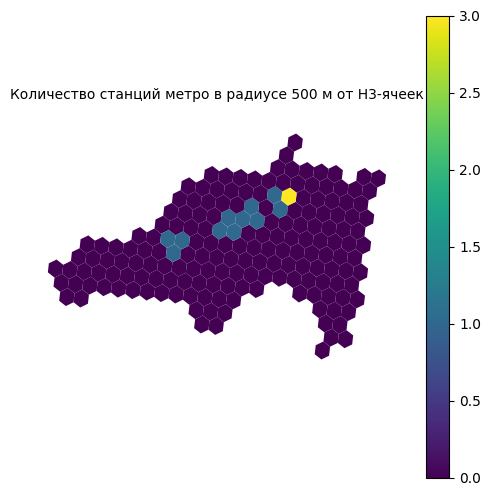

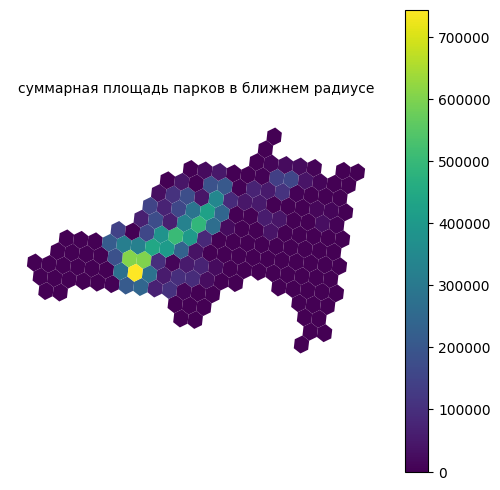

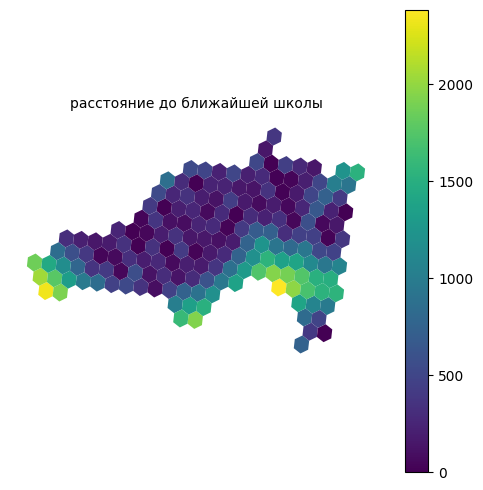

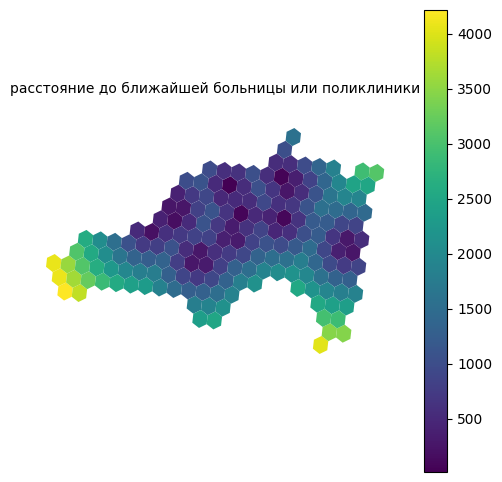

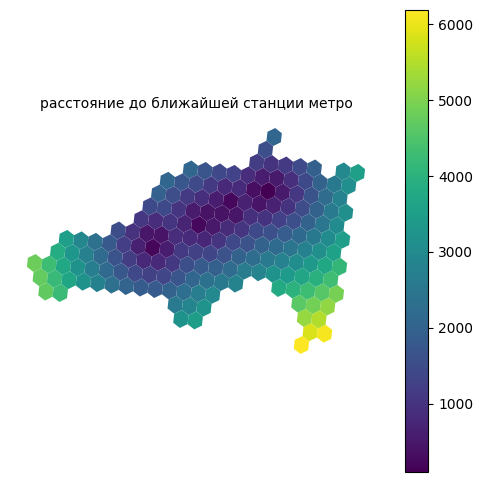

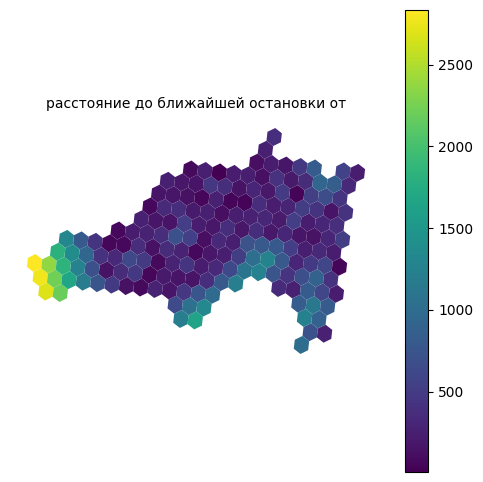

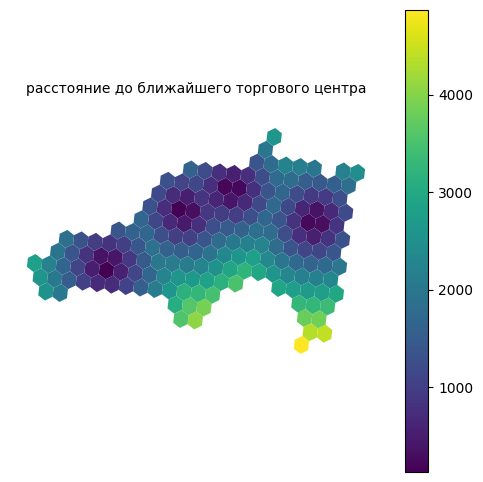

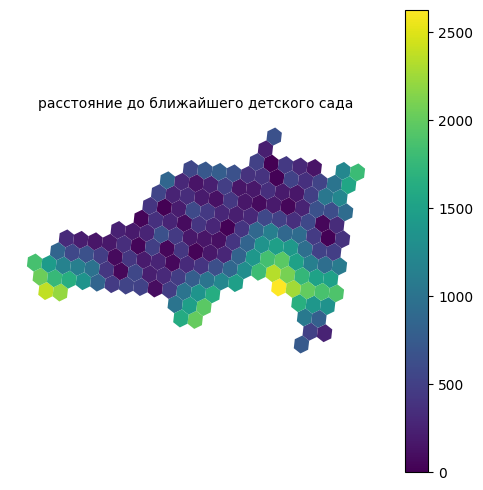

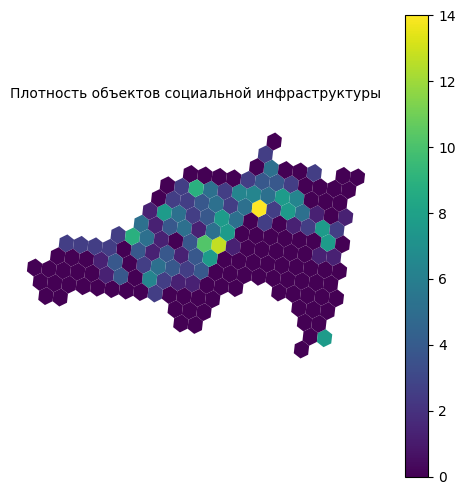

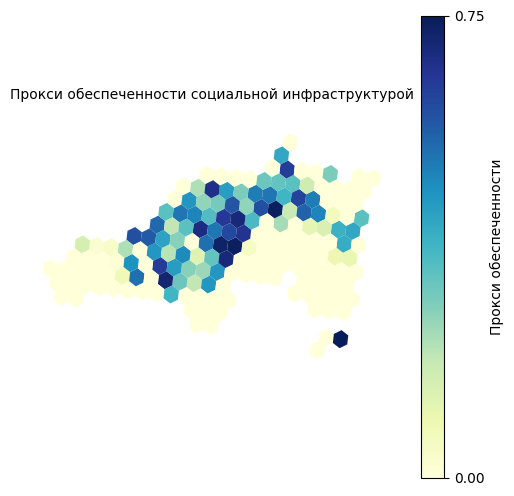

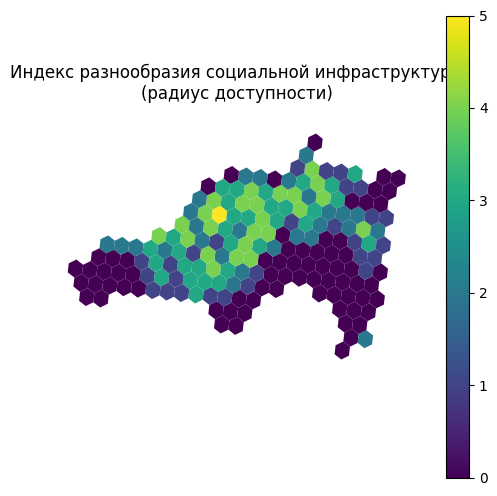

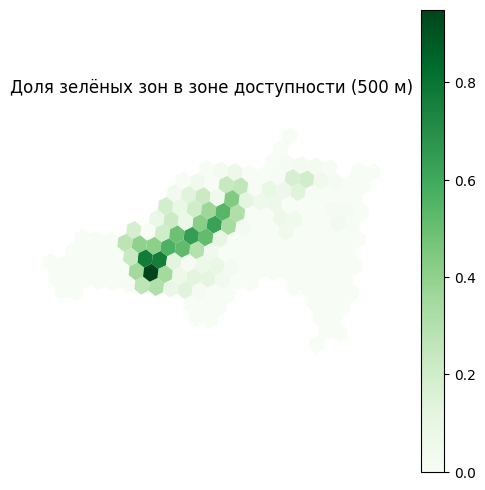

In [249]:
import matplotlib.pyplot as plt
import matplotlib as mpl
hexagons = hexagons.to_crs(epsg=3857)
hexagons["center"] = hexagons.geometry.centroid
hexagons["buffer_500"] = hexagons["center"].buffer(500)
hex_buffer_500 = gpd.GeoDataFrame(
    hexagons[["h3_index"]],
    geometry=hexagons["buffer_500"],
    crs=hexagons.crs
)
hexagons["buffer_900"] = hexagons["center"].buffer(900)
hex_buffer_900 = gpd.GeoDataFrame(
    hexagons[["h3_index"]],
    geometry=hexagons["buffer_900"],
    crs=hexagons.crs
)
education_500_joined = gpd.sjoin(
    education,
    hex_buffer_500,
    how="inner",
    predicate="within"
)
education_500_count = education_500_joined.groupby("h3_index").size()
hexagons["education_500m"] = (
    hexagons["h3_index"]
    .map(education_500_count)
    .fillna(0)
)
ax = hexagons.plot(
    column="education_500m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Количество школ в радиусе 500 м от H3-ячеек",
    fontsize=10
)
ax.axis("off")
shop_500_joined = gpd.sjoin(
    shop,
    hex_buffer_500,
    how="inner",
    predicate="within"
)
shop_500_count = shop_500_joined.groupby("h3_index").size()
hexagons["shop_500m"] = (
    hexagons["h3_index"]
    .map(shop_500_count)
    .fillna(0)
)
ax = hexagons.plot(
    column="shop_500m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Количество ТЦ в радиусе 500 м от H3-ячеек",
    fontsize=10
)
ax.axis("off")
kdg_500_joined = gpd.sjoin(
    kdg,
    hex_buffer_500,
    how="inner",
    predicate="within"
)
kdg_500_count = kdg_500_joined.groupby("h3_index").size()
hexagons["kdg_500m"] = (
    hexagons["h3_index"]
    .map(kdg_500_count)
    .fillna(0)
)
ax = hexagons.plot(
    column="kdg_500m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Количество детских садов в радиусе 500 м от H3-ячеек",
    fontsize=10
)
ax.axis("off")
kdg_900_joined = gpd.sjoin(
    kdg,
    hex_buffer_900,
    how="inner",
    predicate="within"
)
kdg_900_count = kdg_900_joined.groupby("h3_index").size()
hexagons["kdg_900m"] = (
    hexagons["h3_index"]
    .map(kdg_900_count)
    .fillna(0)
)
ax = hexagons.plot(
    column="kdg_900m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Количество детских садов в радиусе 900 м от H3-ячеек",
    fontsize=10
)
ax.axis("off")
health_900_joined = gpd.sjoin(
    health,
    hex_buffer_900,
    how="inner",
    predicate="within"
)
health_900_count = health_900_joined.groupby("h3_index").size()
hexagons["health_900m"] = (
    hexagons["h3_index"]
    .map(health_900_count)
    .fillna(0)
)
ax = hexagons.plot(
    column="health_900m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Количество больниц и поликлиник в радиусе 900 м от H3-ячеек",
    fontsize=10
)
ax.axis("off")
transport_500_joined = gpd.sjoin(
    transport,
    hex_buffer_500,
    how="inner",
    predicate="within"
)
transport_500_count = transport_500_joined.groupby("h3_index").size()
hexagons["transport_500m"] = (
    hexagons["h3_index"]
    .map(transport_500_count)
    .fillna(0)
)
ax = hexagons.plot(
    column="transport_500m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Количество остановок ОТ в радиусе 500 м от H3-ячеек",
    fontsize=10
)
ax.axis("off")
subway_500_joined = gpd.sjoin(
    subway,
    hex_buffer_500,
    how="inner",
    predicate="within"
)
subway_500_count = subway_500_joined.groupby("h3_index").size()
hexagons["subway_500m"] = (
    hexagons["h3_index"]
    .map(subway_500_count)
    .fillna(0)
)
ax = hexagons.plot(
    column="subway_500m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Количество станций метро в радиусе 500 м от H3-ячеек",
    fontsize=10
)
ax.axis("off")
parks_joined = gpd.sjoin(
    green,
    hex_buffer_500,
    how="inner",
    predicate="intersects"
)
parks_joined["park_clip"] = parks_joined.apply(
    lambda row: row.geometry.intersection(
        buffers_500.loc[row["h3_index"]]
    ),
    axis=1
)
parks_joined["park_area"] = parks_joined["park_clip"].area
parks_area_500 = parks_joined.groupby("h3_index")["park_area"].sum()
hexagons["parks_area_500m"] = (
    hexagons["h3_index"]
    .map(parks_area_500)
    .fillna(0)
)
ax = hexagons.plot(
    column="parks_area_500m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "суммарная площадь парков в ближнем радиусе",
    fontsize=10
)
ax.axis("off")
def nearest_distance(points, targets):
    return points.apply(lambda p: targets.distance(p).min())
hexagons["dist_school_m"] = nearest_distance(
    hexagons["center"],
    education.geometry
)
ax = hexagons.plot(
    column="dist_school_m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "расстояние до ближайшей школы",
    fontsize=10
)
ax.axis("off")
hexagons["dist_clinic_m"] = nearest_distance(
    hexagons["center"],
    health.geometry
)
ax = hexagons.plot(
    column="dist_clinic_m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "расстояние до ближайшей больницы или поликлиники",
    fontsize=10
)
ax.axis("off")
hexagons["dist_subway_m"] = nearest_distance(
    hexagons["center"],
    subway.geometry
)
ax = hexagons.plot(
    column="dist_subway_m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "расстояние до ближайшей станции метро",
    fontsize=10
)
ax.axis("off")
hexagons["dist_transport_m"] = nearest_distance(
    hexagons["center"],
    transport.geometry
)
ax = hexagons.plot(
    column="dist_transport_m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "расстояние до ближайшей остановки от",
    fontsize=10
)
ax.axis("off")
hexagons["dist_shop_m"] = nearest_distance(
    hexagons["center"],
    shop.geometry
)
ax = hexagons.plot(
    column="dist_shop_m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "расстояние до ближайшего торгового центра",
    fontsize=10
)
ax.axis("off")
hexagons["dist_kdg_m"] = nearest_distance(
    hexagons["center"],
    kdg.geometry
)
ax = hexagons.plot(
    column="dist_kdg_m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "расстояние до ближайшего детского сада",
    fontsize=10
)
ax.axis("off")
hex_buffer_500["buffer_area_km2"] = (
    hex_buffer_500.geometry.area / 1_000_000
)
infra = pd.concat(
    [
        education[["geometry"]],
        kdg[["geometry"]],
        health[["geometry"]],
        subway[["geometry"]],
        shop[["geometry"]]
    ],
    ignore_index=True
)

infra = gpd.GeoDataFrame(
    infra,
    geometry="geometry",
    crs=hexagons.crs
)
infra_joined = gpd.sjoin(
    infra,
    hex_buffer_500,
    how="inner",
    predicate="within"
)
infra_count = infra_joined.groupby("h3_index").size()
hex_buffer_500["infra_count"] = (
    hex_buffer_500["h3_index"]
    .map(infra_count)
    .fillna(0)
)
hex_buffer_500["infra_density"] = (
    hex_buffer_500["infra_count"] /
    hex_buffer_500["buffer_area_km2"]
)
hexagons["infra_density_500m"] = (
    hexagons["h3_index"]
    .map(
        hex_buffer_500.set_index("h3_index")["infra_density"]
    )
    .fillna(0)
)
ax = hexagons.plot(
    column="infra_density_500m",
    legend=True,
    figsize=(6, 6)
)

ax.set_title(
    "Плотность объектов социальной инфраструктуры",
    fontsize=10
)

ax.axis("off")



boundary_wgs = boundary.to_crs(epsg=4326)
boundary_wgs["geometry"] = boundary_wgs.geometry.buffer(0)

polygon = boundary_wgs.geometry.unary_union

tags_buildings = {"building": True}

buildings = ox.features_from_polygon(
    polygon,
    tags=tags_buildings
)

buildings = buildings.to_crs(hexagons.crs)
buildings_joined = gpd.sjoin(
    buildings,
    hex_buffer_500,
    how="inner",
    predicate="within"
)
buildings_count = buildings_joined.groupby("h3_index").size()
hex_buffer_500["buildings_count"] = (
    hex_buffer_500["h3_index"]
    .map(buildings_count)
    .fillna(0)
)
infra = infra.to_crs(epsg=4326)
hex_buffer_500 = hex_buffer_500.to_crs(epsg=4326)
infra_joined = gpd.sjoin(
    infra,
    hex_buffer_500,
    how="inner",
    predicate="within"
)

infra_count = infra_joined.groupby("h3_index").size()

hex_buffer_500["infra_count"] = (
    hex_buffer_500["h3_index"]
    .map(infra_count)
    .fillna(0)
)
hex_buffer_500["infra_to_buildings"] = (
    hex_buffer_500["infra_count"] /
    hex_buffer_500["buildings_count"].replace(0, None)
)
hexagons["infra_to_buildings"] = (
    hexagons["h3_index"]
    .map(
        hex_buffer_500.set_index("h3_index")["infra_to_buildings"]
    )
)


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

hexagons.plot(
    column="infra_to_buildings",
    cmap="YlGnBu",
    legend=False,   # ❗ отключаем встроенную легенду
    ax=ax
)

ax.set_title("Прокси обеспеченности социальной инфраструктурой", fontsize=10)
ax.axis("off")
vmin = hexagons["infra_to_buildings"].min()
vmax = hexagons["infra_to_buildings"].max()

# Нормализация
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Colorbar
sm = mpl.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm._A = []  # обязательная строка для matplotlib

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Прокси обеспеченности")
cbar.set_ticks([vmin, vmax])
infra_columns = [
    "education_500m",
    "kdg_500m",
    "health_900m",
    "parks_area_500m",
    "shop_500m"
]
infra_presence = hexagons[infra_columns].fillna(0) > 0
hexagons["infra_diversity_index"] = infra_presence.sum(axis=1)
hexagons[[
    "h3_index",
    "infra_diversity_index"
]].head()
hexagons["infra_diversity_index"].value_counts().sort_index()
ax = hexagons.plot(
    column="infra_diversity_index",
    legend=True,
    figsize=(6, 6),
    cmap="viridis"
)

ax.set_title(
    "Индекс разнообразия социальной инфраструктуры\n(радиус доступности)",
    fontsize=12
)

ax.axis("off")

hexagons["buffer_area_m2"] = hexagons["buffer_500"].area
hexagons["green_share_500m"] = (
    hexagons["parks_area_500m"] /
    hexagons["buffer_area_m2"]
)
hexagons["green_share_500m"] = (
    hexagons["green_share_500m"]
    .fillna(0)
    .clip(0, 1)
)
ax = hexagons.plot(
    column="green_share_500m",
    legend=True,
    figsize=(6, 6),
    cmap="Greens"
)

ax.set_title(
    "Доля зелёных зон в зоне доступности (500 м)",
    fontsize=12
)

ax.axis("off")









4. **Базовый анализ признаков**

   - Рассчитайте простые статистики для признаков районов и H3‑ячеек:
     - минимум, максимум, среднее, медиана, квартилли, стандартное отклонение.
   - Исследуйте взаимные **корреляции** между признаками:
     - выделите группы сильно коррелированных признаков;
     - сделайте промежуточные выводы (например, «в районах с большим числом школ больше и остановок ОТ»).
   - Обнаружьте и обработайте:
     - **пропущенные значения** (NaN);
     - **выбросы** (аномально большие или малые значения признаков).
   - Оформите принятые решения (удаление, заполнение, логарифмирование и т.п.).



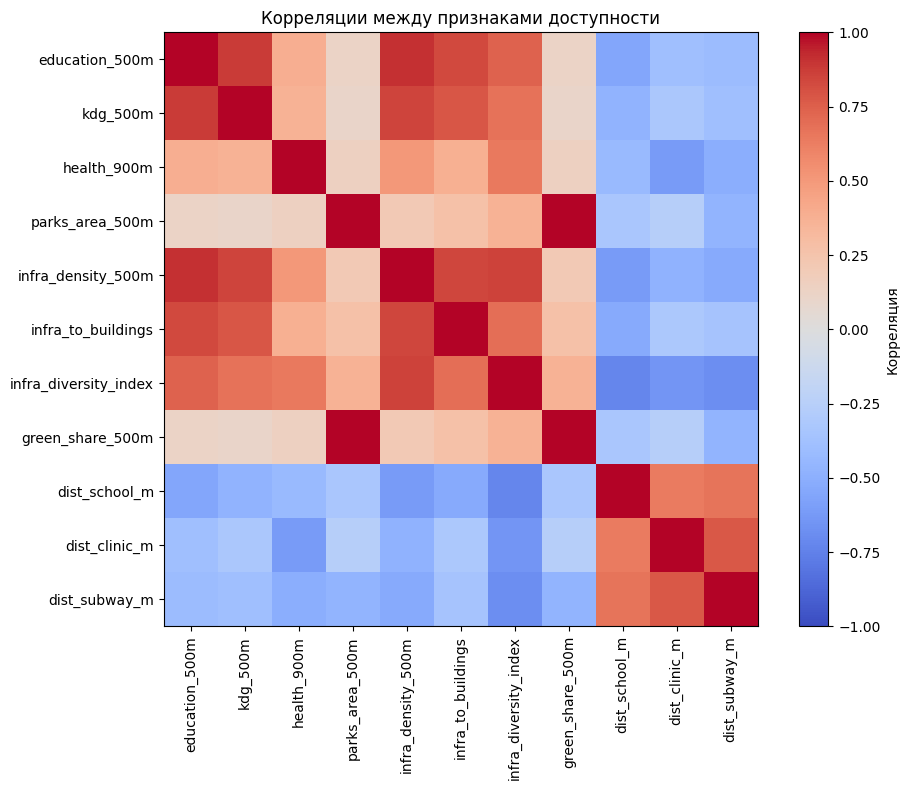

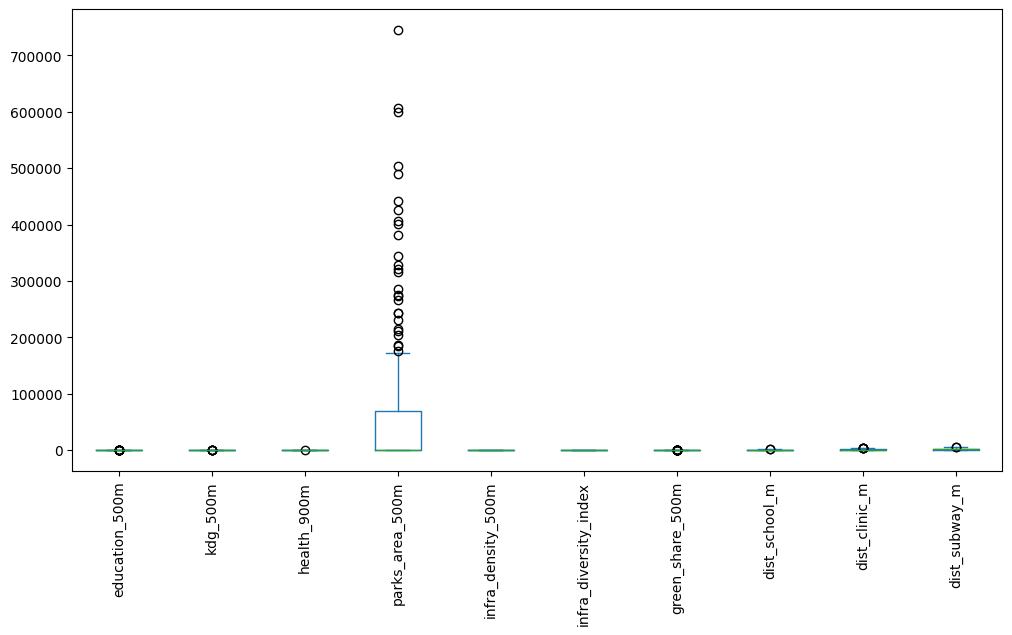

In [254]:
import matplotlib.pyplot as plt
features = [
    "education_500m",
    "kdg_500m",
    "health_900m",
    "parks_area_500m",
    "infra_density_500m",
    "infra_to_buildings",
    "infra_diversity_index",
    "green_share_500m",
    "dist_school_m",
    "dist_clinic_m",
    "dist_subway_m"
]
hexagons[features].describe().T
hexagons[features].quantile([0.25, 0.5, 0.75])
corr = hexagons[features].corr(method="pearson")
corr
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Корреляция")

plt.xticks(range(len(features)), features, rotation=90)
plt.yticks(range(len(features)), features)

plt.title("Корреляции между признаками доступности")
plt.tight_layout()
plt.show()
strong_corr = (
    corr.abs()
    .where(lambda x: x > 0.7)
    .stack()
    .reset_index()
)

strong_corr = strong_corr[strong_corr["level_0"] != strong_corr["level_1"]]
strong_corr
hexagons[features].isna().sum()
fill_zero = [
    "parks_area_500m",
    "green_share_500m",
    "infra_density_500m"
]

hexagons[fill_zero] = hexagons[fill_zero].fillna(0)
hexagons[features].plot(
    kind="box",
    figsize=(12, 6),
    rot=90
)
hexagons["infra_density_500m"] = hexagons["infra_density_500m"].clip(
    lower=lower,
    upper=upper
)
hexagons["infra_density_log"] = np.log1p(
    hexagons["infra_density_500m"]
)
#Анализ корреляций показал наличие выраженного кластера признаков, характеризующих насыщенность социальной инфраструктурой.
#Количество образовательных и медицинских объектов положительно коррелирует с плотностью инфраструктуры и индексом её разнообразия.
#Boxplot-анализ показал наличие выбросов и существенных различий в масштабах значений признаков. В связи с этим для дальнейшего агрегирования показателей была применена процедура нормализации.

---

### **Часть 3. Оценка уровня доступности и типология территорий**

1. **Разработка интегрального индекса доступности**

   - Выберите подмножество наиболее важных признаков (по вашему мнению) для оценки доступности:
     - отдельно для районов;
     - отдельно для H3‑ячеек.
   - Нормализуйте выбранные признаки (например, с помощью MinMaxScaler или z‑нормализации), чтобы привести их к сопоставимому масштабу.
   - Определите **веса** для каждого признака:
     - обоснуйте, почему некоторые признакы важнее других;
     - приведите словесное объяснение (например, «наличие школы в шаговой доступности важнее, чем наличие большого парка, поэтому вес признака выше»).
   - Рассчитайте интегральный **индекс доступности** для:
     - каждого административного района;
     - каждой H3‑ячейки.
   - При желании разделите индекс на составляющие:
     - индекс образовательной доступности;
     - индекс медицинской доступности;
     - индекс транспортной доступности;
     - интегральный комбинированный индекс.

(np.float64(4170428.772957319),
 np.float64(4185178.0311818686),
 np.float64(7462082.710309462),
 np.float64(7471937.206920055))

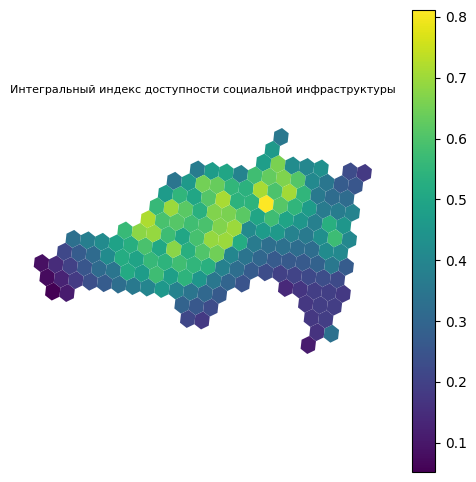

In [257]:
#Для приведения признаков к сопоставимому масштабу была применена Min–Max нормализация.
#Для признаков, отражающих расстояние до объектов, использовалась инверсия шкалы, так как меньшие значения соответствуют лучшей доступности.
from sklearn.preprocessing import MinMaxScaler
positive_features = [
    "education_500m",
    "health_900m",
    "green_share_500m",
    "infra_diversity_index"
]
negative_features = [
    "dist_school_m",
    "dist_clinic_m",
    "dist_subway_m"
]


scaler = MinMaxScaler()
hexagons_norm = hexagons.copy()

hexagons_norm[positive_features] = scaler.fit_transform(
    hexagons[positive_features]
)
hexagons_norm[negative_features] = 1 - scaler.fit_transform(
    hexagons[negative_features]
)
#При определении весов признаков приоритет был отдан объектам базовой социальной инфраструктуры, таким как школы, поликлиники и станции рельсового транспорта,
#поскольку они оказывают наибольшее влияние на повседневную доступность городской среды.
#Экологические и структурные показатели использовались с меньшим весом как дополняющие характеристики.
weights = {
    "education_500m": 0.20,
    "dist_school_m": 0.15,

    "health_900m": 0.15,
    "dist_clinic_m": 0.15,

    "dist_subway_m": 0.20,

    "green_share_500m": 0.10,
    "infra_diversity_index": 0.05
}
hexagons_norm["accessibility_index"] = 0

for feature, weight in weights.items():
    hexagons_norm["accessibility_index"] += (
        hexagons_norm[feature] * weight
    )
hexagons_norm["accessibility_index"].describe()
ax = hexagons_norm.plot(
    column="accessibility_index",
    legend=True,
    figsize=(6, 6),
    cmap="viridis"
)

ax.set_title(
    "Интегральный индекс доступности социальной инфраструктуры",
    fontsize=8
)

ax.axis("off")


### **Часть 4. Визуализация результатов и формирование выводов**

1. **Тепловая карта по административным районам**

   - Переведите слой районов обратно в систему координат `EPSG:4326` для отображения.
   - С помощью `leafmap` или `folium` постройте **хороплет‑карту (choropleth)**:
     - заливка районов по значению интегрального индекса доступности;
     - выберите подходящую цветовую схему (например, `Blues`, `Greens`, `YlGnBu`);
     - добавьте легенду с подписью (например, «Индекс доступности социальной инфраструктуры»).
   - При необходимости создайте несколько слоёв:
     - отдельные карты для разных компонент индекса (образование/медицина/транспорт).

In [292]:
# ===============================
# ИМПОРТ
# ===============================
import folium
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import branca.colormap as cm


# ===============================
# 1. НОРМАЛИЗАЦИЯ ПРИЗНАКОВ
# ===============================
hex = hexagons_norm.copy()

scaler = MinMaxScaler()

positive_features = [
    "education_500m",
    "kdg_500m",
    "health_900m",
    "transport_500m"
]

hex[positive_features] = scaler.fit_transform(hex[positive_features])

negative_features = [
    "dist_subway_m"
]

hex[negative_features] = 1 - scaler.fit_transform(hex[negative_features])


# ===============================
# 2. ПОДИНДЕКСЫ
# ===============================
hex["education_index"] = (
    0.6 * hex["education_500m"] +
    0.4 * hex["kdg_500m"]
)

hex["health_index"] = hex["health_900m"]

hex["transport_index"] = (
    0.7 * hex["dist_subway_m"] +
    0.3 * hex["transport_500m"]
)

hex["accessibility_index"] = (
    0.4 * hex["education_index"] +
    0.3 * hex["health_index"] +
    0.3 * hex["transport_index"]
)


# ===============================
# 3. ПОДГОТОВКА ДАННЫХ
# ===============================
hex_wgs = hex.to_crs(epsg=4326)

hex_folium = hex_wgs[[
    "h3_index",
    "geometry",
    "accessibility_index",
    "education_index",
    "health_index",
    "transport_index"
]].copy()


# ===============================
# 4. КАРТА
# ===============================
m = folium.Map(
    location=[55.75, 37.62],
    zoom_start=12,
    tiles="cartodbpositron"
)


# ===============================
# 5. ЦВЕТОВЫЕ ШКАЛЫ
# ===============================
access_cmap = cm.linear.YlGnBu_09.scale(
    hex_folium["accessibility_index"].min(),
    hex_folium["accessibility_index"].max()
)
access_cmap.caption = "Интегральный индекс доступности"

education_cmap = cm.linear.Blues_09.scale(
    hex_folium["education_index"].min(),
    hex_folium["education_index"].max()
)

health_cmap = cm.linear.Greens_09.scale(
    hex_folium["health_index"].min(),
    hex_folium["health_index"].max()
)

transport_cmap = cm.linear.OrRd_09.scale(
    hex_folium["transport_index"].min(),
    hex_folium["transport_index"].max()
)


# ===============================
# 6. ФУНКЦИЯ ДОБАВЛЕНИЯ СЛОЁВ
# ===============================
def add_hex_layer(map_obj, gdf, column, name, cmap):

    folium.GeoJson(
        gdf,
        name=name,
        style_function=lambda feature: {
            "fillColor": cmap(feature["properties"][column]),
            "color": "black",
            "weight": 0.2,
            "fillOpacity": 0.75
        }
    ).add_to(map_obj)


# ===============================
# 7. СЛОИ
# ===============================
add_hex_layer(
    m,
    hex_folium,
    "accessibility_index",
    "Интегральный индекс доступности (H3)",
    access_cmap
)

add_hex_layer(
    m,
    hex_folium,
    "education_index",
    "Образовательная доступность",
    education_cmap
)

add_hex_layer(
    m,
    hex_folium,
    "health_index",
    "Медицинская доступность",
    health_cmap
)

add_hex_layer(
    m,
    hex_folium,
    "transport_index",
    "Транспортная доступность",
    transport_cmap
)


# ===============================
# 8. TOOLTIP
# ===============================
folium.GeoJson(
    hex_folium,
    style_function=lambda x: {
        "fillOpacity": 0,
        "color": "black",
        "weight": 0.1
    },
    tooltip=folium.GeoJsonTooltip(
        fields=[
            "accessibility_index",
            "education_index",
            "health_index",
            "transport_index"
        ],
        aliases=[
            "Интегральный индекс:",
            "Образовательная доступность:",
            "Медицинская доступность:",
            "Транспортная доступность:"
        ],
        localize=True
    )
).add_to(m)


# ===============================
# 9. КОНТРОЛЬ СЛОЁВ
# ===============================
folium.LayerControl(collapsed=False).add_to(m)


# ===============================
# 10. ЛЕГЕНДА (ВСЕГДА В КОНЦЕ)
# ===============================
access_cmap.add_to(m)


m



2. **Тепловая карта по H3‑сетки**

   - Переведите H3‑ячейки в CRS `EPSG:4326`.
   - Постройте отдельную карту, где:
     - каждая H3‑ячейка окрашена в соответствии с индексом доступности или номером кластера;
     - используйте хорошую цветовую палитру (например, `OrRd`, `RdYlGn`);
     - настройте прозрачность заливки, чтобы можно было видеть подложку карты.
   - Добавьте всплывающие подсказки (popup/tooltip) с основными показателями для выбранной ячейки:
     - значение индекса;
     - количество объектов;
     - расстояние до ближайшего объекта и т.п.

In [298]:
import folium
import branca.colormap as cm

# --- чистим данные ---
hex_folium = hex_wgs[[
    "geometry",
    "accessibility_index",
    "education_500m",
    "health_900m",
    "transport_500m",
    "dist_subway_m"
]].copy()

# --- карта ---
m = folium.Map(
    location=[55.75, 37.62],
    zoom_start=12,
    tiles="cartodbpositron"
)

# --- цветовая шкала ---
vmin = hex_folium["accessibility_index"].min()
vmax = hex_folium["accessibility_index"].max()

colormap = cm.linear.RdYlGn_11.scale(vmin, vmax)
colormap.caption = "Индекс доступности социальной инфраструктуры"

# --- стиль ---
def style_function(feature):
    value = feature["properties"]["accessibility_index"]
    return {
        "fillColor": colormap(value),
        "color": "black",
        "weight": 0.2,
        "fillOpacity": 0.7
    }

# --- tooltip ---
tooltip = folium.GeoJsonTooltip(
    fields=[
        "accessibility_index",
        "education_500m",
        "health_900m",
        "transport_500m",
        "dist_subway_m"
    ],
    aliases=[
        "Индекс доступности:",
        "Школы (500 м):",
        "Медицина (900 м):",
        "Остановки ОТ (500 м):",
        "Расстояние до метро (м):"
    ],
    localize=True
)

# --- H3-ячейки ---
folium.GeoJson(
    hex_folium,
    style_function=style_function,
    tooltip=tooltip,
    name="Тепловая карта (H3)"
).add_to(m)

colormap.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

m


3. **Выделение зон с высокой и низкой доступностью**

   - Определите **пороги** (например, по квартилям или по значениям индекса), чтобы выделить:
     - зоны с высокой доступностью;
     - зоны с низкой доступностью.
   - На карте H3‑ячеек:
     - визуально выделите несколько локальных «кластеров» высокой и низкой доступности;
     - подпишите или сохраните их идентификаторы (H3‑индекс, координаты).

In [300]:
import folium

# ===============================
# 1. ПОДГОТОВКА ДАННЫХ
# ===============================
# hex_folium должен содержать accessibility_index и geometry
# (EPSG:4326)

# Проверка
assert "accessibility_index" in hex_folium.columns


# ===============================
# 2. ПОРОГИ ПО КВАРТИЛЯМ
# ===============================
q1 = hex_folium["accessibility_index"].quantile(0.25)
q3 = hex_folium["accessibility_index"].quantile(0.75)

print("Q1:", q1)
print("Q3:", q3)


# ===============================
# 3. КЛАССИФИКАЦИЯ ЯЧЕЕК
# ===============================
def classify_accessibility(x):
    if x <= q1:
        return "low"
    elif x >= q3:
        return "high"
    else:
        return "medium"

hex_folium["access_class"] = hex_folium["accessibility_index"].apply(classify_accessibility)

# Проверка
print(hex_folium["access_class"].value_counts())


# ===============================
# 4. КАРТА
# ===============================
m = folium.Map(
    location=[55.75, 37.62],
    zoom_start=12,
    tiles="cartodbpositron"
)


# ===============================
# 5. СТИЛЬ ПО КЛАССАМ
# ===============================
def style_by_class(feature):
    cls = feature["properties"]["access_class"]

    if cls == "high":
        return {
            "fillColor": "#2ECC71",   # зелёный
            "color": "black",
            "weight": 0.3,
            "fillOpacity": 0.7
        }
    elif cls == "low":
        return {
            "fillColor": "#E74C3C",   # красный
            "color": "black",
            "weight": 0.3,
            "fillOpacity": 0.7
        }
    else:
        return {
            "fillColor": "#CCCCCC",   # серый
            "color": "black",
            "weight": 0.1,
            "fillOpacity": 0.25
        }


# ===============================
# 6. H3-ЯЧЕЙКИ НА КАРТЕ
# ===============================
folium.GeoJson(
    hex_folium[
        [
            "geometry",
            "accessibility_index",
            "access_class",
            "education_500m",
            "health_900m",
            "transport_500m",
            "dist_subway_m"
        ]
    ],
    style_function=style_by_class,
    tooltip=folium.GeoJsonTooltip(
        fields=[
            "access_class",
            "accessibility_index",
            "education_500m",
            "health_900m",
            "transport_500m",
            "dist_subway_m"
        ],
        aliases=[
            "Класс доступности:",
            "Индекс доступности:",
            "Школы (500 м):",
            "Медицина (900 м):",
            "Остановки ОТ (500 м):",
            "Расстояние до метро (м):"
        ],
        localize=True
    ),
    name="Зоны высокой и низкой доступности"
).add_to(m)


# ===============================
# 7. КОНТРОЛЬ СЛОЁВ
# ===============================
folium.LayerControl(collapsed=False).add_to(m)

m


Q1: 0.10257174282348197
Q3: 0.22978954174652294
access_class
medium    89
low       46
high      46
Name: count, dtype: int64








4. **Интерпретация результатов и рекомендации**

   - Подготовьте **краткий текстовый анализ**, в котором:
     - опишите общую картину по району/городу:
       - какие части города наиболее обеспечены социальной инфраструктурой;
       - какие — недообеспечены;
     - проанализируйте различия между:
       - оценкой по районам;
       - и оценкой по H3‑ячеек (более детальный уровень).
   - Сформулируйте **5–7 практических рекомендаций**, например:
     - где целесообразно планировать строительство новых школ/детсадов/поликлиник;
     - какие районы требуют улучшения транспортной доступности;
     - какие зоны уже хорошо обеспечены и могут служить «бенчмарками» для планирования других территорий.
   - Укажите **проблемы исследования**:
     - неполнота данных OSM;
     - отсутствие данных о численности населения;
     - грубые допущения при выборе радиусов и весов.

---

In [ ]:
# Ваш код